# __Genet Sebehat__

## __Applied Data Science with Python__
### __Course End Project__

### __Marketing Campaigns__

#### __Problem scenario:__  
Marketing mix stands as a widely utilized concept in the execution of marketing 
strategies. It encompasses various facets within a comprehensive marketing plan, 
with a central focus on the four Ps of marketing: product (wine, fruits, and gold), 
price (data presented to the user such as birth year, education, income), 
place (sales channels, such as websites and stores), and promotion (various campaigns). 

#### __Goal of the project:__
To conduct exploratory data analysis and hypothesis testing to enhance the comprehension of the diverse factors influencing customer acquisition.

In [6]:
# Import the necessary libraries
import pandas as pd

In [7]:
# Load the data
df = pd.read_csv('marketing_data[1].csv')

#### __Steps to perform:__

1. After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.

In [10]:
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# Inspect the dataset
print(df.info())  # Overview of columns and data types
print(df.head())  # Preview of the data
print(df.isnull().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Step 2: Handle Missing Income Values
Analyze Missing Data:
Check how many rows have missing values in the Income column.
Group customers by Education and Marital_Status to calculate average incomes.
Impute Missing Income:
Replace missing values with the mean income for similar groups.

In [12]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [13]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [14]:
# Remove dollar signs and commas, and strip any extra spaces
df['Income'] = df['Income'].replace({'$': '', ',': ''}, regex=True).str.strip()

# Convert to numeric, forcing errors to NaN if any invalid entries exist
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Fill missing values in Income based on Education and Marital Status
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.mean())
)

3. Create Derived Variables to represent the total number of children, age, and total 
spending.

a. Derive the total purchases from the number of transactions across the 
three channels. 

- Total Number of Children:
Sum Kidhome and Teenhome.
- Age:
Calculate Age as Current Year - Year_Birth.
- Total Spending:
Sum spending across columns like MntWines, MntFruits, etc.
- Total Purchases:
Sum purchases across channels: NumWebPurchases, NumCatalogPurchases, NumStorePurchases.

In [17]:
from datetime import datetime

# Current year for age calculation
current_year = datetime.now().year

# Derive new variables
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = current_year - df['Year_Birth']
df['Total_Spending'] = (
    df['MntWines'] + df['MntFruits'] + 
    df['MntMeatProducts'] + df['MntFishProducts'] + 
    df['MntSweetProducts'] + df['MntGoldProds']
)
df['Total_Purchases'] = (
    df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
)

Step 3.1: Verify New Variables
Once the new variables are created:

Inspect the dataset again to confirm the calculations are correct.
Preview the first few rows.

In [19]:
print(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head())

   Total_Children  Age  Total_Spending  Total_Purchases
0               0   55            1190               14
1               0   64             577               17
2               1   67             251               10
3               2   58              11                3
4               1   36              91                6


4. Generate a Heatmap to Illustrate the Correlation Between Different Pairs of Variables

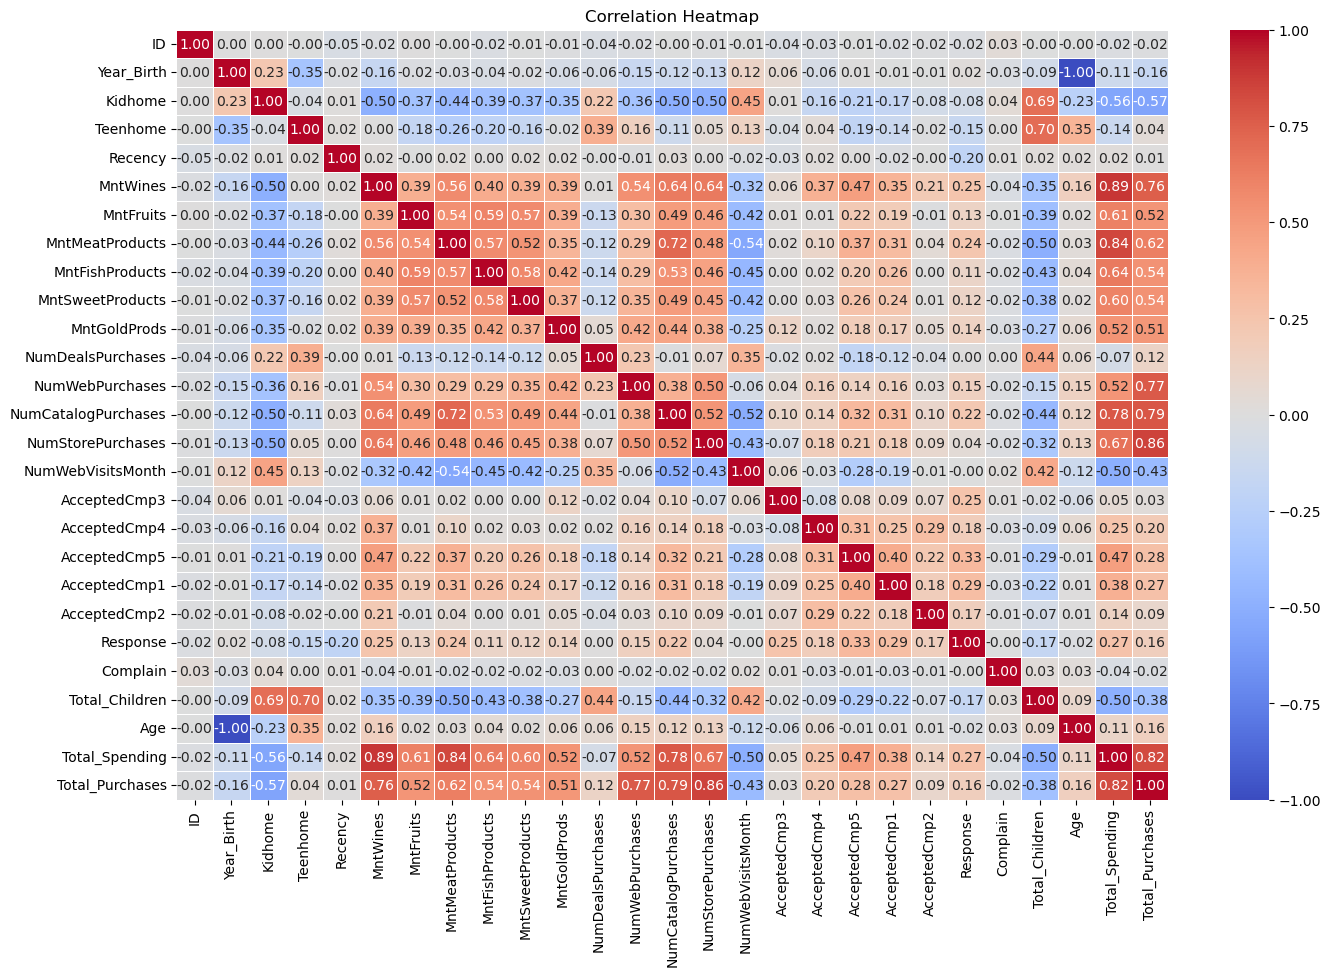

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = df.select_dtypes('int').columns
num_vars

# First Compute the correlation matrix
corr_matrix = df[num_vars].corr()

# Generate the heatmap
plt.figure(figsize=(16, 10))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

- The stronger correlation values are shown in warmer colors.
- The weaker or negative correlation values are shown in cooler colors.

5. Test the Hypotheses

a. Older individuals may not possess the same level of technological 
proficiency and may, therefore, lean toward traditional in-store shopping 
preferences. 

- Method: This could be tested using a Chi-square test of independence if you have categorical data for age and shopping preferences.
Steps:
Categorize ages and analyze the relationship between these age categories and shopping preferences (online or in-store).


1. Categorize Age into the Specified Groups
You can create a new column Age_Group to represent the different age groups:

In [25]:
# Categorize Age into the specified groups
bins = [0, 12, 19, 40, float('inf')]  # Bins for age groups
labels = ['kids', 'teenager', 'young', 'senior']  # Age group labels
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check the new column
print(df[['Age', 'Age_Group']].head())

   Age Age_Group
0   55    senior
1   64    senior
2   67    senior
3   58    senior
4   36     young


In [26]:
# Create a new column for Shopping Preference based on the number of purchases
df['Shopping_Preference'] = df.apply(
    lambda row: 'Online' if (row['NumWebPurchases'] + row['NumCatalogPurchases']) > row['NumStorePurchases']
    else 'In-Store', axis=1
)

# Check the new 'Shopping_Preference' column
print(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Shopping_Preference']].head())

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

  Shopping_Preference  
0              Online  
1              Online  
2            In-Store  
3            In-Store  
4              Online  


2. Create a Contingency Table
We will now create the contingency table between Age_Group and Shopping_Preference:

In [28]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children',
       'Age', 'Total_Spending', 'Total_Purchases', 'Age_Group',
       'Shopping_Preference'],
      dtype='object')


In [29]:
# Create a contingency table of Age_Group vs Shopping_Preference
contingency_table = pd.crosstab(df['Age_Group'], df['Shopping_Preference'])

# Print the contingency table to check the data
print(contingency_table)

Shopping_Preference  In-Store  Online
Age_Group                            
young                     120      69
senior                   1142     909


b. Customers with children likely experience time constraints, making online shopping a more convenient option.
- Method: We can test this hypothesis by comparing the frequency of online shopping between customers with and without children using a Chi-square test or a t-test if the data is numeric (e.g., time spent shopping).
Example for Chi-square test:

In [31]:
# Step 1: Create the 'Has_Children' column
df['Has_Children'] = df.apply(
    lambda row: 1 if (row['Total_Children'] > 0 or row['Kidhome'] > 0 or row['Teenhome'] > 0) else 0,
    axis=1
)

In [32]:
# Step 2: Create the contingency table between 'Has_Children' and 'Shopping_Preference'
contingency_table_children = pd.crosstab(df['Has_Children'], df['Shopping_Preference'])

# Print the contingency table
print(contingency_table_children)

# Step 3: Perform the Chi-square test
from scipy.stats import chi2_contingency

chi2, p_val, _, _ = chi2_contingency(contingency_table_children)

# Print the results of the Chi-square test
print(f"Chi2: {chi2}, p-value: {p_val}")


Shopping_Preference  In-Store  Online
Has_Children                         
0                         279     359
1                         983     619
Chi2: 56.94313692974317, p-value: 4.4859710289790666e-14


In [33]:
# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis - there is a significant difference the frequency of online shopping between customers with and without children")
else:
    print("Fail to reject the null hypothesis - no significant difference in the frequency of online shopping between customers with and without children")

Reject the null hypothesis - there is a significant difference the frequency of online shopping between customers with and without children


c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
- Method: This hypothesis can be tested by comparing the sales at physical stores with the sales through
alternative channels (e.g., online, mobile) using a paired t-test or ANOVA if there are multiple groups.
Example for paired t-test:

In [35]:
from scipy.stats import ttest_rel

# Step 1: Perform paired t-test between sales at physical stores and online sales
# We can replace 'NumWebPurchases' with any other alternative sales column if needed
t_stat, p_value = ttest_rel(df['NumStorePurchases'], df['NumWebPurchases'])

# Step 2: Print the result of the t-test
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 26.59923142999471, p-value: 1.071216676927514e-135


Step 2: Interpret the Results
If the p-value is less than 0.05, you can conclude that there is a significant difference between the sales at physical stores and online/mobile sales, suggesting that online/mobile sales may be cannibalizing sales at physical stores.
If the p-value is greater than 0.05, there is no significant difference, meaning there's no evidence of cannibalization.

In [37]:
# Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference between the sales at physical stores and online/mobile sales.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference, meaning there's no evidence of cannibalization.")

Reject the null hypothesis - there is a significant difference between the sales at physical stores and online/mobile sales.


Step 3: For Multiple Alternative Channels (ANOVA)
If you wish to compare more than two groups (e.g., physical store sales, online sales, and catalog sales), you can use ANOVA instead of a paired t-test.

In [39]:
from scipy.stats import f_oneway

# Step 1: Perform one-way ANOVA to compare sales between multiple channels (store, web, catalog)
f_stat, p_value_anova = f_oneway(df['NumStorePurchases'], 
                                 df['NumWebPurchases'], 
                                 df['NumCatalogPurchases'])

# Step 2: Print the result of the ANOVA test
print(f"F-statistic: {f_stat}, p-value: {p_value_anova}")

F-statistic: 614.2763795960092, p-value: 1.0036088810388535e-245


In [40]:
# Interpret the Results
# for ANOVA If the p-value is less than 0.05, it indicates that there is a significant difference in sales between 
# the physical stores and the alternative channels (i.e., cannibalization might be happening). If the p-value is greater 
# than 0.05, no significant difference is found.
alpha = 0.05
if p_value_anova < alpha:
    print("Reject the null hypothesis - there is a significant difference in sales between the physical stores and the alternative channels.")
else:
    print("Fail to reject the null hypothesis - no significant difference is found.")

Reject the null hypothesis - there is a significant difference in sales between the physical stores and the alternative channels.


d. Does the United States significantly outperform the rest of the world in total purchase volumes?
- Method: This can be tested using a t-test comparing the total purchase volumes for the United States against all other countries. We’ll first need to filter or separate the data by the United States and other countries.

- Approach:
Separate the Data: We will separate the data into two groups:
United States: Customers from the United States.
Other Countries: Customers from all other countries.
T-test: We will use a t-test to compare the Total_Purchases between these two groups.

In [43]:
# Check unique values in the 'Country' column
print(df['Country'].unique())

['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


In [44]:
# We will filter the data based on the Country column. We'll have one group for the United States and one group for all other countries.
# Step 1: Separate the data into two groups - US and Other countries (using country codes)
us_data = df[df['Country'] == 'US']  # Filter for 'US'
other_countries_data = df[df['Country'] != 'US']  # Filter for all other countries

# Check the groups again
print(f"US data count: {us_data.shape[0]}")
print(f"Other countries data count: {other_countries_data.shape[0]}")

US data count: 109
Other countries data count: 2131


Step 2: T-test
Next, we'll use a t-test to compare the Total_Purchases between customers in the United States and those in other countries.

In [46]:
from scipy.stats import ttest_ind

# Step 2: Perform an independent t-test to compare total purchases between the US and other countries
t_stat, p_val = ttest_ind(us_data['Total_Purchases'], other_countries_data['Total_Purchases'])

# Step 3: Print the results
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: 1.4512386847675383, p-value: 0.14685355981832418


In [47]:
# Interpret the Results
# If the p-value is less than 0.05, there is a significant difference in total purchases between the United States and other countries.
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis - there is a significant difference in total purchases between the United States and other countries.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in total purchases between the United States and other countries.")

Fail to reject the null hypothesis - there is no significant difference in total purchases between the United States and other countries.


Step 4: Check for Normality (Optional)
Before performing a t-test, it's a good practice to check if the data is normally distributed. If the data is not normal, you may consider using a non-parametric test like the Mann-Whitney U test.

In [49]:
# Check normality using the Shapiro-Wilk test
from scipy.stats import shapiro

us_stat, us_p = shapiro(us_data['Total_Purchases'])
other_stat, other_p = shapiro(other_countries_data['Total_Purchases'])

print(f"US normality test p-value: {us_p}")
print(f"Other countries normality test p-value: {other_p}")


US normality test p-value: 0.0019590229861658278
Other countries normality test p-value: 6.423168502067042e-30


6. Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

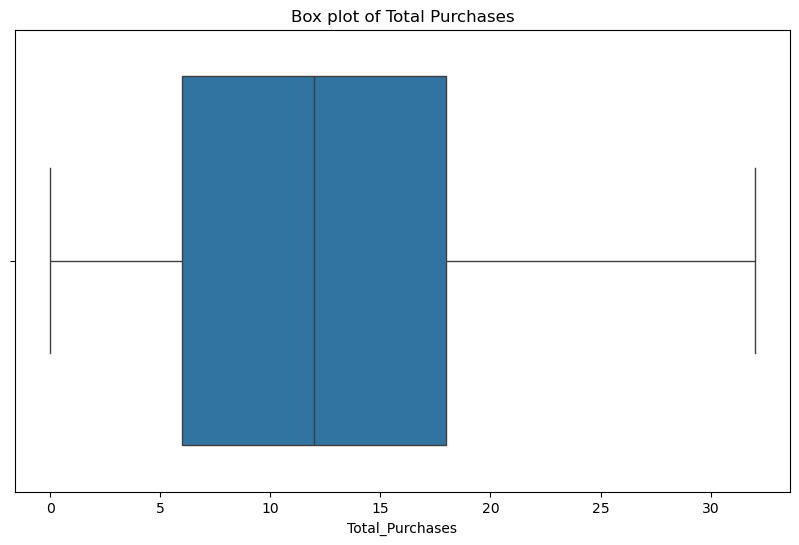

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a box plot to visualize the distribution of 'Total_Purchases'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Purchases')
plt.title('Box plot of Total Purchases')
plt.show()

Histogram
Histograms help visualize the distribution of data. You can use this for any numeric column to understand its distribution.

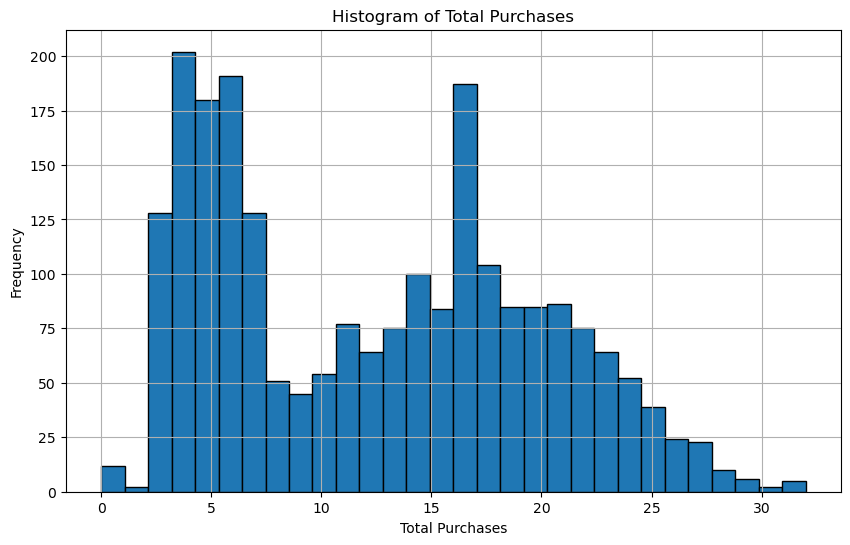

In [53]:
# Step 2: Create a histogram for the 'Total_Purchases' column
plt.figure(figsize=(10, 6))
df['Total_Purchases'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Frequency')
plt.show()


7. Apply ordinal and one-hot encoding based on the various types of categorical variables.

- Outlier Detection and Treatment
To detect outliers, We can use methods like the IQR (Interquartile Range) method or Z-scores.

- IQR Method
Outliers can be defined as values that fall below the lower quartile minus 1.5 times the IQR, or above the upper quartile plus 1.5 times the IQR.

In [56]:
# Step 3: Detect outliers using IQR
Q1 = df['Total_Purchases'].quantile(0.25)
Q3 = df['Total_Purchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = df[(df['Total_Purchases'] >= lower_bound) & 
                          (df['Total_Purchases'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {df.shape[0] - filtered_data.shape[0]}")


Number of outliers removed: 0


In [57]:
# Step 3: Detect outliers using IQR
Q1 = df['Total_Purchases'].quantile(0.25)
Q3 = df['Total_Purchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = df[(df['Total_Purchases'] >= lower_bound) & 
                          (df['Total_Purchases'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {df.shape[0] - filtered_data.shape[0]}")


Number of outliers removed: 0


In [58]:
from sklearn.preprocessing import OrdinalEncoder

# Adjust the education_order list to include all categories found in the data
education_order = ['PhD', 'Master', 'Bachelor', 'High School', 'Other', '2n Cycle', 'Graduation', 'Basic']
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Apply encoding
df['Education_Ordinal'] = ordinal_encoder.fit_transform(df[['Education']])

# Check the result
print(df[['Education', 'Education_Ordinal']].head())

    Education  Education_Ordinal
0  Graduation                6.0
1  Graduation                6.0
2  Graduation                6.0
3  Graduation                6.0
4  Graduation                6.0


One-Hot Encoding
- One-hot encoding is used for nominal categorical variables, like Country or Marital_Status.

In [60]:
# Apply one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Country', 'Marital_Status', 'Shopping_Preference'], drop_first=True)

# Check the new DataFrame
print(df_encoded.head())


      ID  Year_Birth   Education  Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation     NaN        0         0  2014-06-16   
1      1        1961  Graduation     NaN        0         0  2014-06-15   
2  10476        1958  Graduation     NaN        0         1  2014-05-13   
3   1386        1967  Graduation     NaN        1         1  2014-05-11   
4   5371        1989  Graduation     NaN        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Country_SP  Country_US  \
0        0       189        104  ...        True       False   
1        0       464          5  ...       False       False   
2        0       134         11  ...       False        True   
3        0        10          0  ...       False       False   
4        0         6         16  ...        True       False   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                 False                     True                   False   
1           

drop_first=True: This drops the first level of each categorical column to avoid multicollinearity (especially important when building models).

Summary
- Box plots and histograms give us visual insights into distributions and outliers.
- Outlier treatment can be handled using methods like IQR or Z-scores.
- Ordinal encoding is used when there is a meaningful order in categorical values, and one-hot encoding is for nominal categories.

8. Use Appropriate Visualizations to Help Analyze the Following:
- a. Identify the Top-Performing Products and Those with the Lowest Revenue
To analyze top-performing products and those with the lowest revenue, we can create bar plots for the amount spent on different product categories.

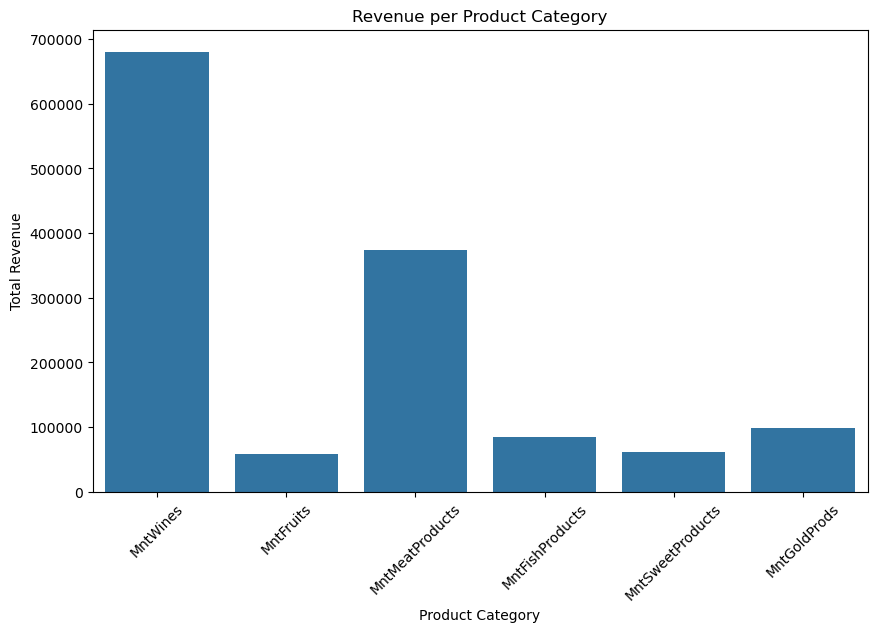

Top-performing products: MntWines
Lowest revenue product: MntFruits


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the spending per product category
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df[product_columns].sum()

# Create a bar plot to visualize the revenue per product category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values)
plt.title('Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Top-performing products
print("Top-performing products:", product_revenue.idxmax())

# Lowest revenue product
print("Lowest revenue product:", product_revenue.idxmin())


- b. Examine if there is a correlation between customers' age and the acceptance rate of the last campaign. 
  Here, we can use a scatter plot to visualize the relationship between age and acceptance rate.

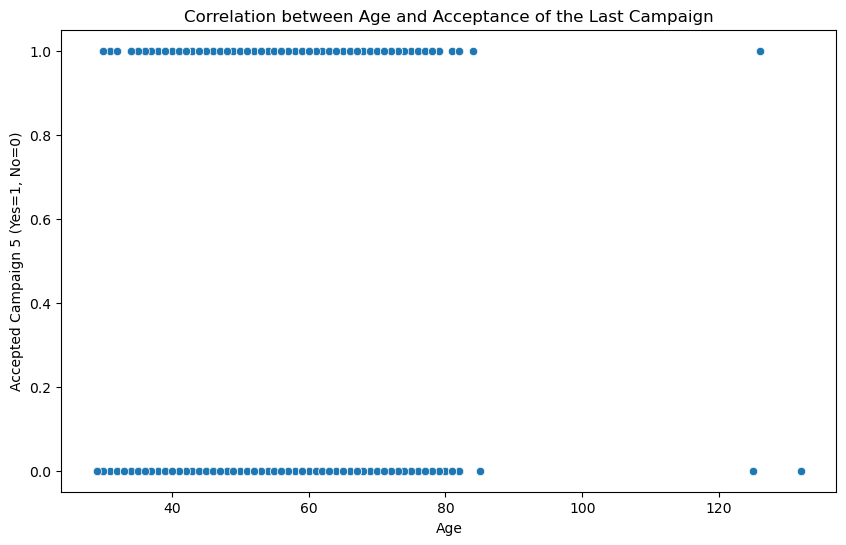

Correlation between Age and Acceptance of Last Campaign: -0.0071225415359875985


In [66]:
# Scatter plot to examine correlation between Age and Acceptance of the last campaign (AcceptedCmp5)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='AcceptedCmp5')
plt.title('Correlation between Age and Acceptance of the Last Campaign')
plt.xlabel('Age')
plt.ylabel('Accepted Campaign 5 (Yes=1, No=0)')
plt.show()

# Calculate the correlation coefficient
correlation = df[['Age', 'AcceptedCmp5']].corr()
print("Correlation between Age and Acceptance of Last Campaign:", correlation.iloc[0, 1])


- c. Determine the country with the highest number of customers who accepted the last campaign. 
To find the country with the highest acceptance rate, we can use a bar plot to show the number of accepted campaigns per country.

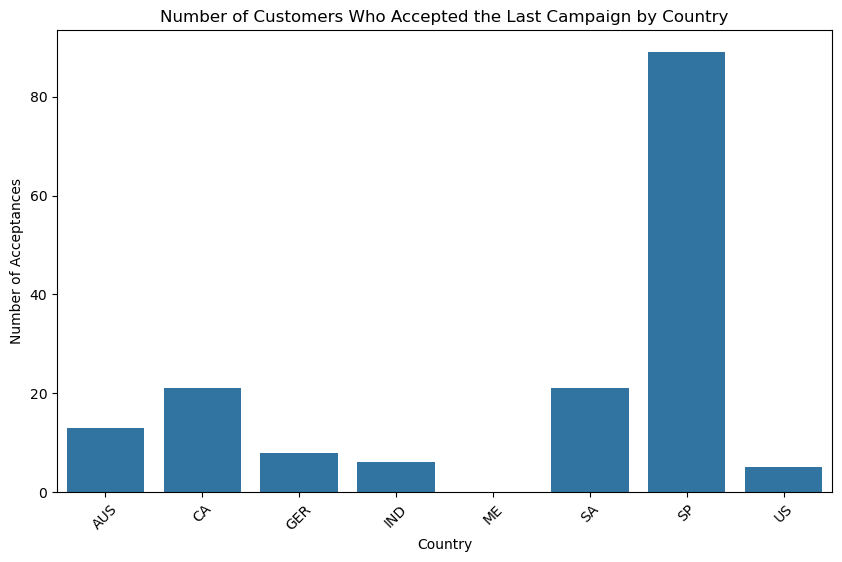

Country with the highest acceptance rate: SP


In [68]:
# Group by country and calculate the number of customers who accepted the last campaign (AcceptedCmp5)
country_acceptance = df.groupby('Country')['AcceptedCmp5'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_acceptance.index, y=country_acceptance.values)
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=45)
plt.show()

# Country with highest acceptance rate
print("Country with the highest acceptance rate:", country_acceptance.idxmax())


- d. Investigate if there is a discernible pattern in the number of children at home and the total expenditure. 
We can use a scatter plot to examine the relationship between the number of children (Total_Children) and total expenditure (Total_Spending).

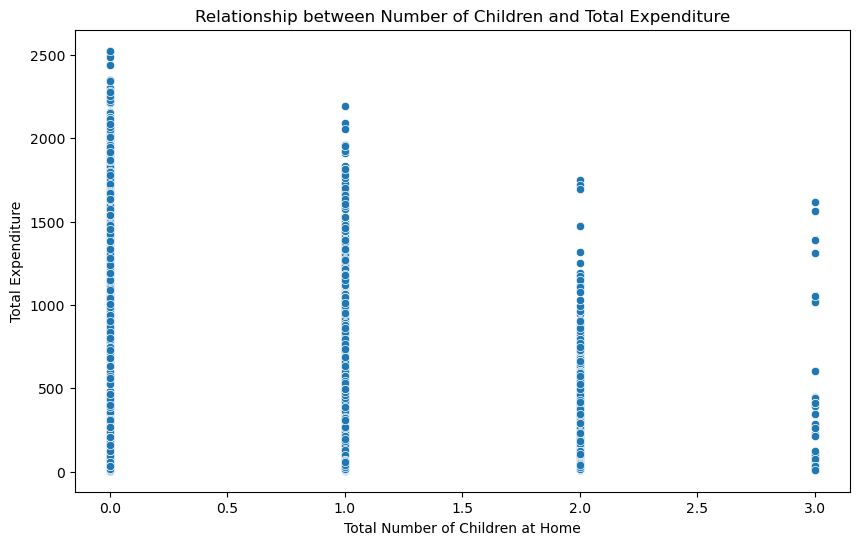

Correlation between Number of Children and Total Expenditure: -0.49888764868089974


In [70]:
# Scatter plot to analyze the relationship between number of children and total expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Children', y='Total_Spending')
plt.title('Relationship between Number of Children and Total Expenditure')
plt.xlabel('Total Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.show()

# Calculate the correlation between the number of children and total expenditure
correlation = df[['Total_Children', 'Total_Spending']].corr()
print("Correlation between Number of Children and Total Expenditure:", correlation.iloc[0, 1])


- e. Analyze the educational background of customers who lodged complaints in the last two years. 
We can use a bar plot to show the distribution of education levels for customers who complained.

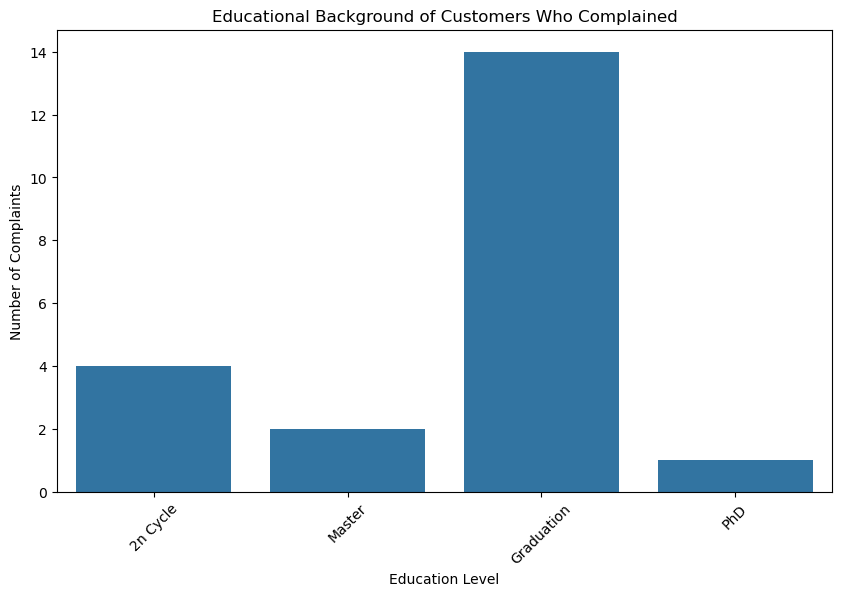

Educational background distribution for complaints:
 Education
Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: count, dtype: int64


In [72]:
# Filter customers who complained (Complain column: 1 for complain)
complaints_data = df[df['Complain'] == 1]

# Plot the distribution of education levels for customers who complained
plt.figure(figsize=(10, 6))
sns.countplot(data=complaints_data, x='Education')
plt.title('Educational Background of Customers Who Complained')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

# Check the distribution of education levels for customers who complained
education_distribution = complaints_data['Education'].value_counts()
print("Educational background distribution for complaints:\n", education_distribution)


#### __Summary of the visualization:__
- Revenue Analysis (a): A bar plot to identify top-performing products.
- Age vs Campaign Acceptance (b): A scatter plot to explore the relationship between age and acceptance rate.
- Country Acceptance (c): A bar plot to find which country has the highest acceptance rate for the last campaign.
- Children vs Expenditure (d): A scatter plot to analyze the pattern between the number of children and total spending.
- Education vs Complaints (e): A count plot to visualize the educational background of customers who complained.